# 1 Objectives


1. Do Exploratory Data Analysis on the kaggle data
  - Inspect dataset, create visualizations, ect.
  - packages used: d3.js

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

# 2 Dataset

**2.1 Load Dataset**

---

Lets load the data and get familiar with the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets


In [3]:
# Load the dataset
cad_data = pd.read_csv('CoronaryArteryDiseaseSplit.csv')
cad_data.head()


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Nonanginal,Exertional CP,LowTH Ang,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,N,N,N,N,0,N,N,N,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,N,N,N,N,1,N,N,N,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,N,N,N,N,1,N,N,N,N,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,N,N,N,Y,0,Y,Y,N,N,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,N,N,Y,N,0,Y,N,N,N,Normal


**2.2 Identify Features**

---

**Features:**
The features in this dataset are divided into two categories: Demographic Features; and Symptom and Examination Features

**Demographic Features**
- Age: Represents the age of the patient
- Weight: This variable represents the patients weight in Kilograms
- Sex: this variable is coded Fmale for Female, Male for Male
- BMI: The body mass index (Kg/m2) of the patient
- Flag Columns:
  - DM: Diabetes Mellitus
  - HTN: Hypertension
  - Current Smoker
  - Ex-Smoker
  - FH: Famlilty History
  - Obesity: This Feature is linked to BMI. A patient with a BMI > 25 is listed as obese. Because of this dependant relationship we could consider dropping this variable from the dataset

**Symptom and Examination Features**
- BP: The examined blood pressure (mmHg) of the patient
- PR: The examined pulse rate (ppm) of the patient
- Flag Columns - the following flag columns are coded 0 if the feature symptom was not found in the examination and 1 if it was:
  - Edema
  - Weak Peripheral Pulse
  - Lung rales
  - Systolic Murmur
  - Diastolic Murmur
  - Typical Chest Pain
  - Dyspnea
  - Nonaginal CP: Nonaginal CP
  - Extortional CP: Extortional Chest Pain
  - Low Th Ang: Low Threshold agnina

**Target Feature**
- Cath: Whether or not the patient was diagnosed with Coronary Artery Disease. This variable is coded Cad if diagnosed, and Normal otherwise.


**2.3 Identify Missing Values**

---

This dataset is complete. There are no columns that contain missing values.

In [4]:
# Checking for missing values in each column
missing_values = cad_data.isnull().sum()
missing_values

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Cath                     0
dtype: int64

**2.4 Checking For Inconsistent Categorical Variables**

---

We'll inspect the unique values of the categorical columns to ensure there are no inconsistencies or typos.

From this inspection, it appears as though Exertional CP only has one value "N". This might imply that this feature may not add any significant value to the analysis, as it doesn't vary across the dataset. We should consider dropping this feature from the dataset

In [5]:
# List of categorical columns to check
categorical_columns = ["Sex", "Obesity", "Weak Peripheral Pulse", "Lung rales", "Systolic Murmur",
                       "Diastolic Murmur", "Dyspnea", "Nonanginal", "Exertional CP",
                       "LowTH Ang", "Cath"]

# Extract unique values for each categorical column
unique_values_categorical = {column: cad_data[column].unique() for column in categorical_columns}

unique_values_categorical

{'Sex': array(['Male', 'Fmale'], dtype=object),
 'Obesity': array(['Y', 'N'], dtype=object),
 'Weak Peripheral Pulse': array(['N', 'Y'], dtype=object),
 'Lung rales': array(['N', 'Y'], dtype=object),
 'Systolic Murmur': array(['N', 'Y'], dtype=object),
 'Diastolic Murmur': array(['N', 'Y'], dtype=object),
 'Dyspnea': array(['N', 'Y'], dtype=object),
 'Nonanginal': array(['N', 'Y'], dtype=object),
 'Exertional CP': array(['N'], dtype=object),
 'LowTH Ang': array(['N', 'Y'], dtype=object),
 'Cath': array(['Cad', 'Normal'], dtype=object)}

# 3 EDA

***3.1 Univariate Analysis***
---

**3.1.1 Diagnosis Distribution**

The distribution of the Cath features, which represents whether or not a patient is diagnosed, skews heavily towards the Coronary Artery Disease (Cad), category. This indicates a imbalanced distribution, with a larger proportion of patients diagnosed with Coronary Artery Disease.

In [6]:
fig = px.pie(cad_data, names='Cath')
fig.show()

**3.1.2 Distribution of Numerical Values**

Here's a summary of the distributions for each of the numerical variables:

- Age: The age distribution is fairly uniform, with a slight increase in the middle-age group (around 50-60 years).
- Weight: Most patients weigh between 60 to 90 kg, with a few outliers on both the lower and higher ends.
- Length (Height): The majority of patients have a height ranging between 150 to 180 cm.
- BMI: The Body Mass Index (BMI) shows a right-skewed distribution, with most patients having a BMI in the range of 20 to 30.
- BP (Blood Pressure): Blood pressure has a somewhat normal distribution centered around 120-140 mmHg, with a few outliers on both ends.
- PR (Pulse Rate): The pulse rate is mostly centered around 60 to 90 beats per minute.

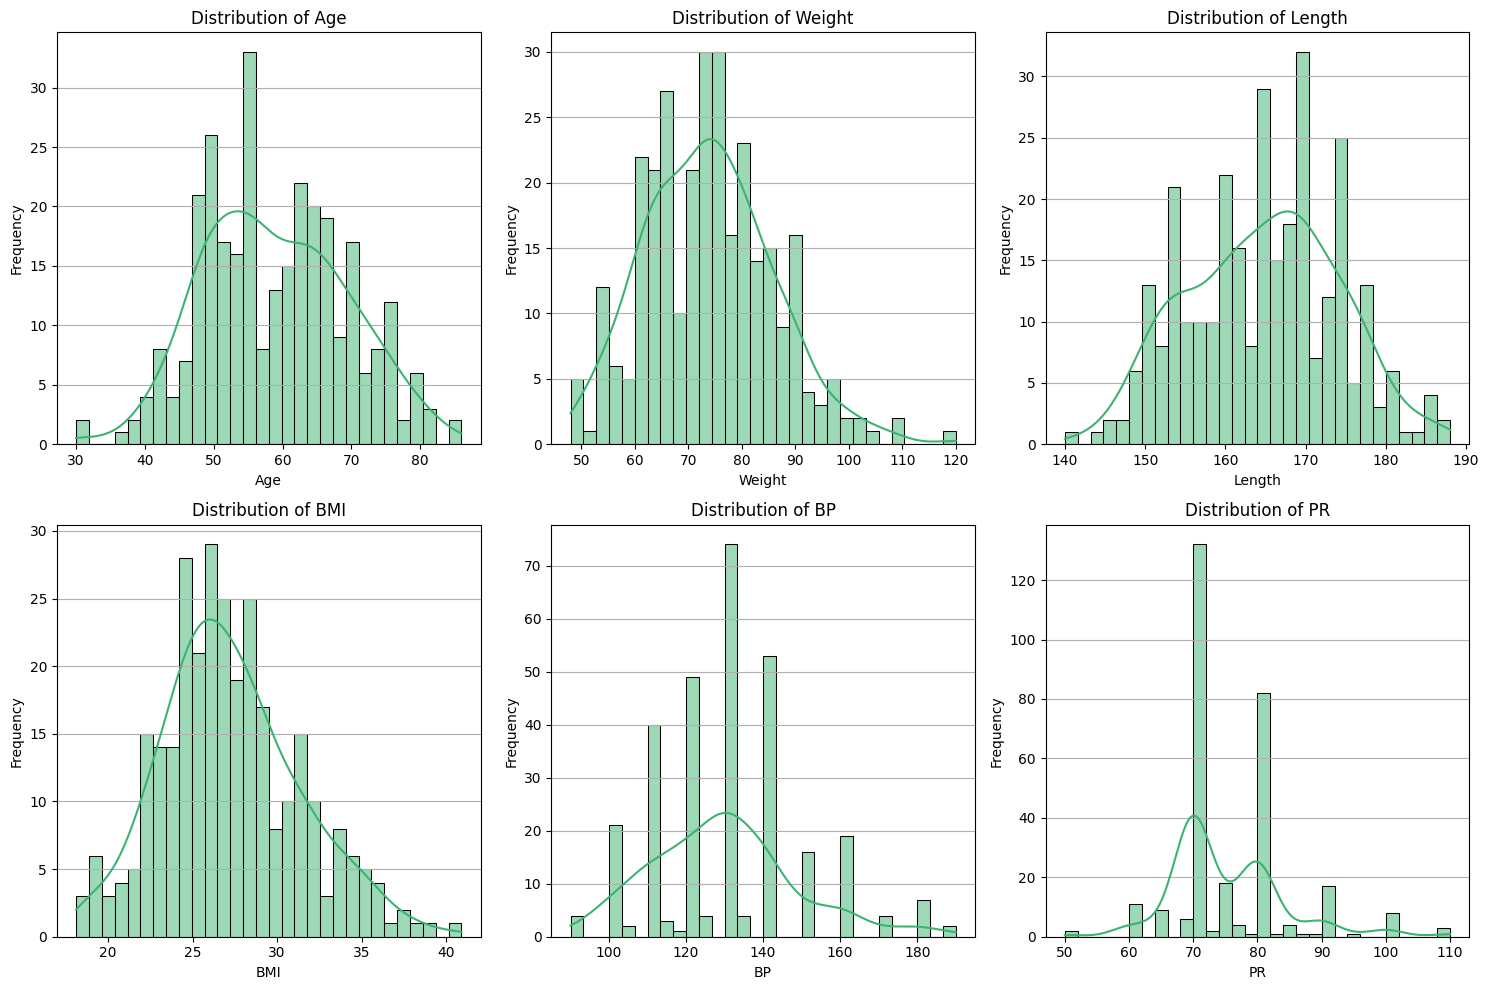

In [7]:
# Plotting histograms for numerical variables
plt.figure(figsize=(15, 10))

numerical_columns = ["Age", "Weight", "Length", "BMI", "BP", "PR"]
for idx, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(cad_data[column], bins=30, kde=True, color='mediumseagreen')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# 3.2 Bivariate Analysis

In bivariate analysis, we'll examine the relationships between two variables. This will help us understand how variables interact with one another. Specifically, we'll start by looking at the relationship between the a patients diagnosis and the other variables, so we can see what features have a clear effect on whether or not a patient has Coronary Artery Disease

**3.2.1 Gender Distribution Based on Diagnosis**

The dataset contains more Male patients than Female patients. In both the categories (CAD and Normal) Males makeup the majority of the population. Males account for greater majority of the patients with Coronary Artery Disease (CAD) than for patients without Coronary Artery Disease.

This suggests that males may have a slighly *higher* likelihood of being diagnosed with CAD compared to females in this dataset.

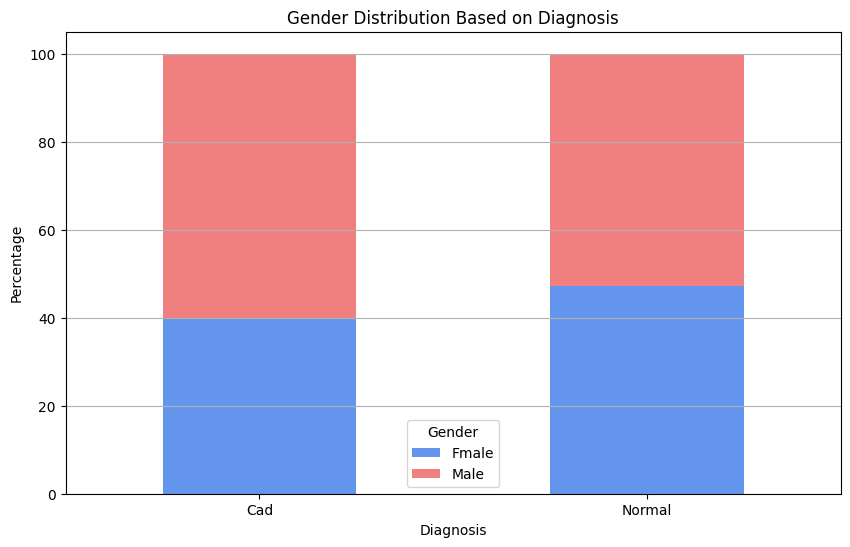

In [8]:
# Calculating the distribution of gender based on diagnosis
gender_distribution = cad_data.groupby("Cath")["Sex"].value_counts(normalize=True).unstack() * 100

# Plotting stacked bar plot for gender distribution based on diagnosis
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=["cornflowerblue", "lightcoral"])
plt.title('Gender Distribution Based on Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.show()

<Figure size 1000x700 with 0 Axes>

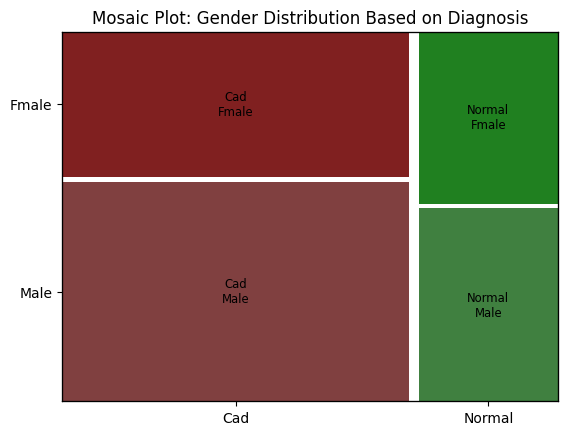

In [9]:
from statsmodels.graphics.mosaicplot import mosaic

# Creating the mosaic plot
plt.figure(figsize=(10, 7))
mosaic(cad_data, ['Cath', 'Sex'], title='Mosaic Plot: Gender Distribution Based on Diagnosis', gap=0.02)
plt.show()

**3.2.2 Age Distribution Based on Diagnosis**


For patients diagnosed with Coronary Artery Disease (CAD):
  - The age distribution is broader, with a prominent peak around the mid-50s.
  - There's also a noticeable concentration of patients in the late 50s to mid-60s age range.

For patients diagnosed as normal:
  - The age distribution is slightly skewed towards younger ages, with a peak around the early 50s.

The plot suggests that older patients tend to have a higher likelihood of being diagnosed with CAD, although there is some overlap between the two groups.

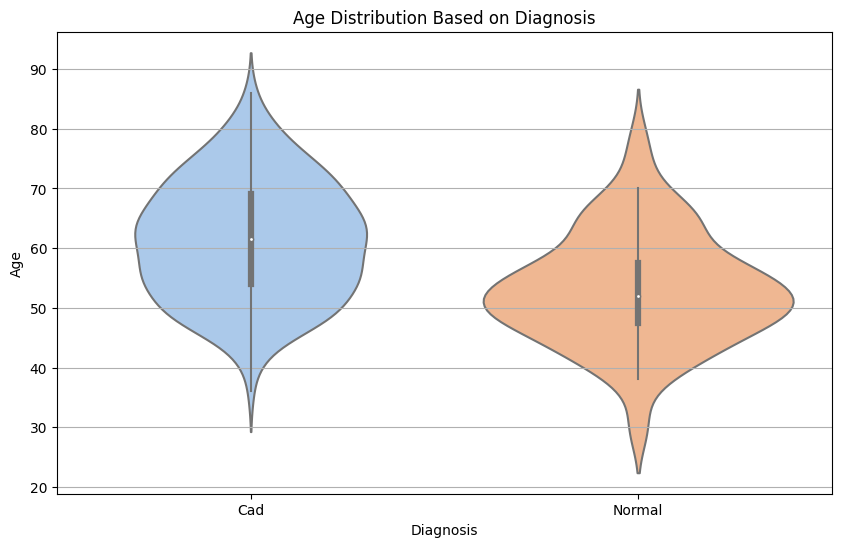

In [10]:
# Plotting violin plot for age distribution based on diagnosis
plt.figure(figsize=(10, 6))
sns.violinplot(x=cad_data["Cath"], y=cad_data["Age"], palette="pastel")
plt.title('Age Distribution Based on Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

**3.2.3 BMI Distribution Based on Diagnosis**

For both patients diagnosed with Coronary Artery Disease (CAD) and those diagnosed as normal:
- The median BMI is slightly above 25, which is in the overweight range.
- The interquartile range (IQR) for both groups is roughly between 23 and 30, with some outliers on the higher end.

The distribution of BMI for both groups is quite similar, indicating that BMI alone might not be a strong distinguishing factor for CAD diagnosis in this dataset.

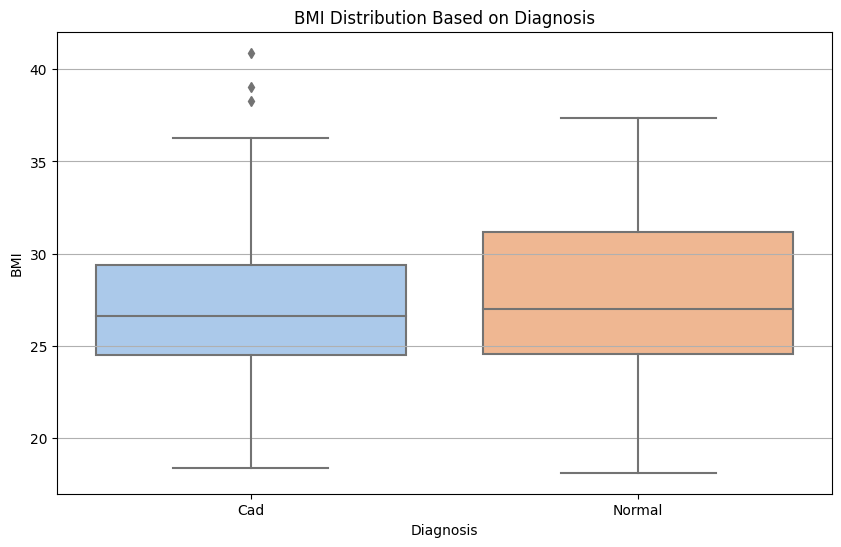

In [11]:
# Plotting box plot for BMI distribution based on diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x=cad_data["Cath"], y=cad_data["BMI"], palette="pastel")
plt.title('BMI Distribution Based on Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
plt.grid(axis='y')
plt.show()

**3.2.4 Smoking Distribution Based on Diagnosis**

For patients diagnosed with Coronary Artery Disease (CAD), there's a higher number of smokers compared to non-smokers.

For patients diagnosed as normal, the distribution is more balanced between smokers and non-smokers, with a slight edge towards non-smokers.

This suggests that smoking is a potential risk factor for CAD, as a higher proportion of CAD-diagnosed patients are smokers compared to those diagnosed as normal.

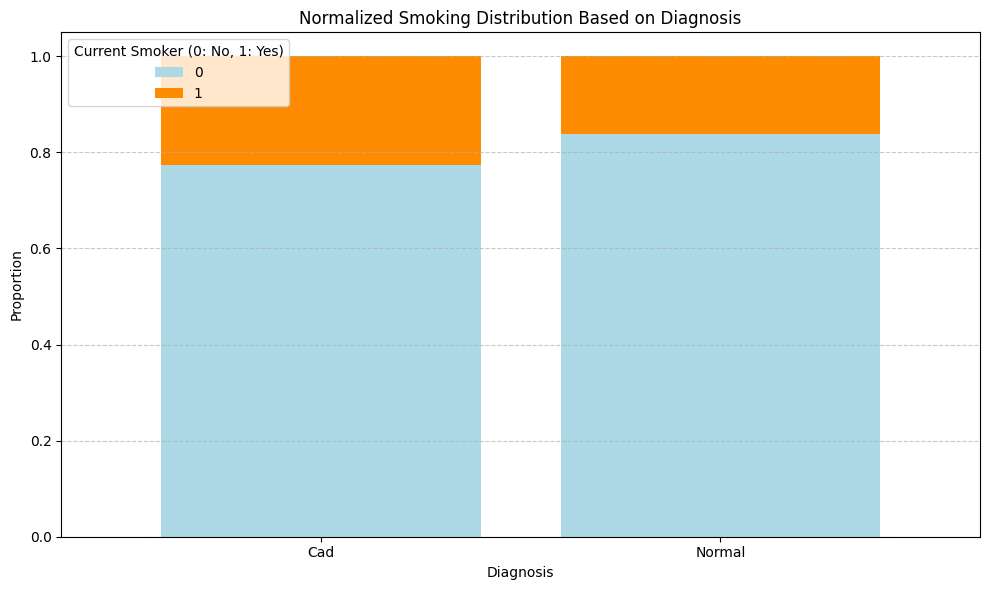

In [12]:
# Calculating the distribution of smoking status based on diagnosis
smoking_diag_counts = cad_data.groupby('Cath')['Current Smoker'].value_counts().unstack()

# Normalizing the smoking distribution data to represent proportions
smoking_diag_normalized = smoking_diag_counts.div(smoking_diag_counts.sum(axis=1), axis=0)

# Plotting a normalized stacked bar chart for smoking distribution based on diagnosis
smoking_diag_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), color=["lightblue", "darkorange"], width=0.8)
plt.title('Normalized Smoking Distribution Based on Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Current Smoker (0: No, 1: Yes)', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.5 Diabetes Distribution Based on Diagnosis**

For patients diagnosed with Coronary Artery Disease (CAD):
- There's a higher number of patients with diabetes compared to those without.

For patients diagnosed as normal:
- The majority do not have diabetes, with only a small fraction being diabetic.

This suggests that diabetes is a potential risk factor for CAD, as a higher proportion of CAD-diagnosed patients have diabetes compared to those diagnosed as normal.

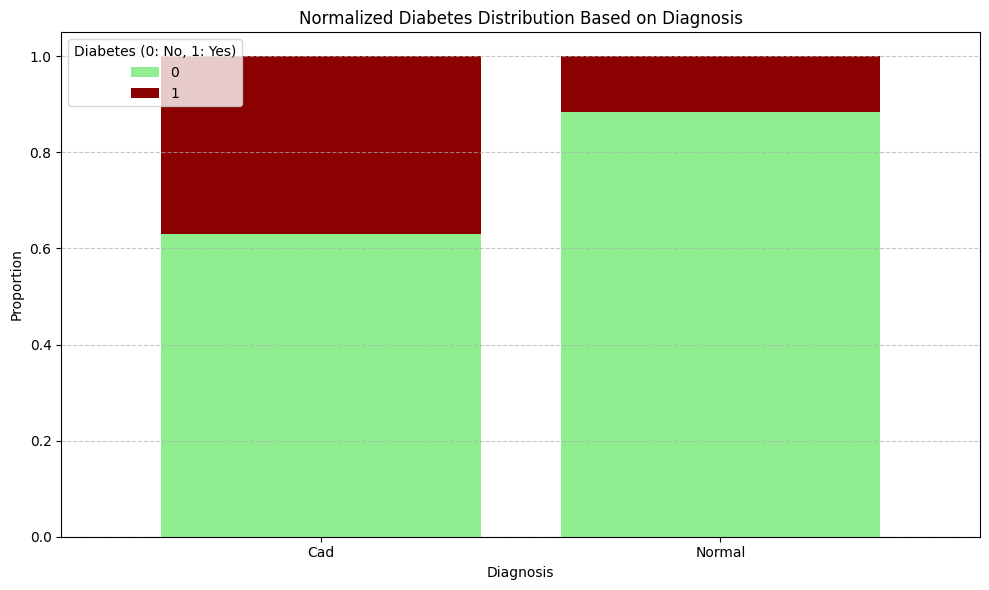

In [13]:
diabetes_diag_counts = cad_data.groupby('Cath')['DM'].value_counts().unstack()

# Normalizing the diabetes distribution data to represent proportions
diabetes_diag_normalized = diabetes_diag_counts.div(diabetes_diag_counts.sum(axis=1), axis=0)

# Plotting a normalized stacked bar chart for diabetes distribution based on diagnosis
diabetes_diag_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), color=["lightgreen", "darkred"], width=0.8)
plt.title('Normalized Diabetes Distribution Based on Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Diabetes (0: No, 1: Yes)', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3.3 Multivariate Analysis

**3.3.1 Correlation Between All Numerical Variables**

Understanding correlations is essential as it can help in feature selection and model building. Highly correlated features might not provide additional information to a model and can sometimes be excluded to reduce the model's complexity.

From the heatmap, we can observe:

- BMI has a strong positive correlation with Weight and Length (Height), which is expected since BMI is a function of weight and height.
- Age has a moderate positive correlation with BP (Blood Pressure), suggesting that as patients age, their blood pressure tends to increase.
- All other variables have relatively low correlations with each other.

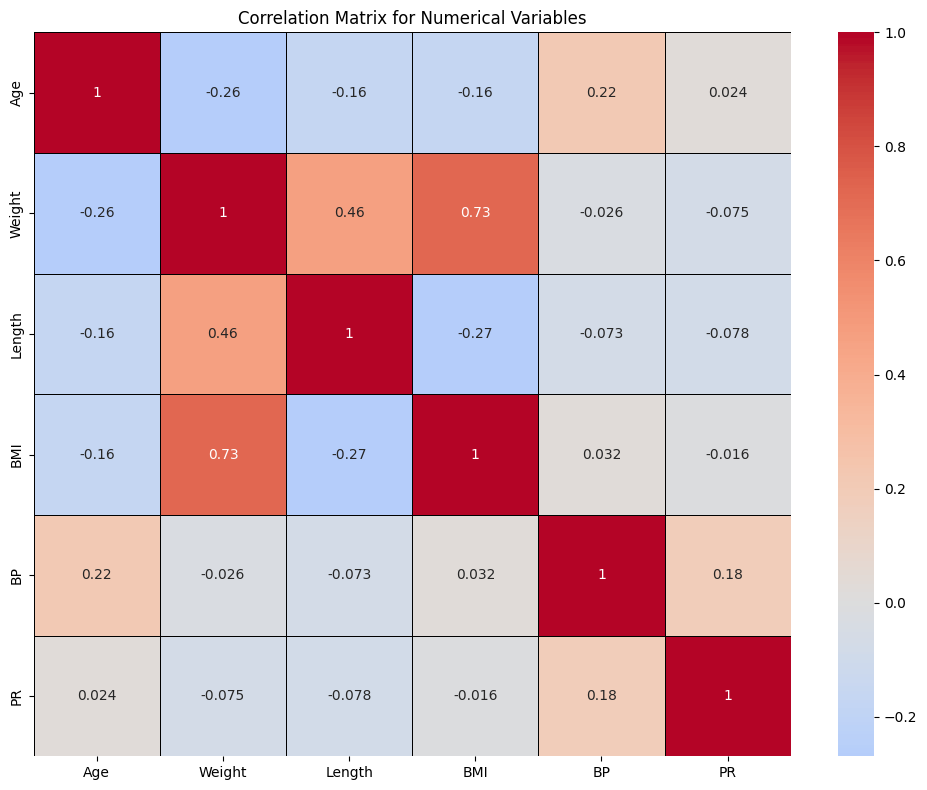

In [14]:
# Defining the list of numerical columns again
numerical_columns = ["Age", "Weight", "Length", "BMI", "BP", "PR"]

# Calculate the correlation matrix for numerical columns
correlation_matrix = cad_data[numerical_columns].corr()

# Plotting a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix for Numerical Variables')
plt.tight_layout()
plt.show()

**3.3.2 Age And Gender**

- Males:
  - A significant number of males in the age range of 50-70 are diagnosed with Coronary Artery Disease (CAD).
  - Younger males (below 50) tend to be diagnosed as normal.
- Females:
  - Females in the age range of 50-70 also have a higher likelihood of being diagnosed with CAD, though the number is less than that of males.
  - Similar to males, younger females tend to be diagnosed as normal.

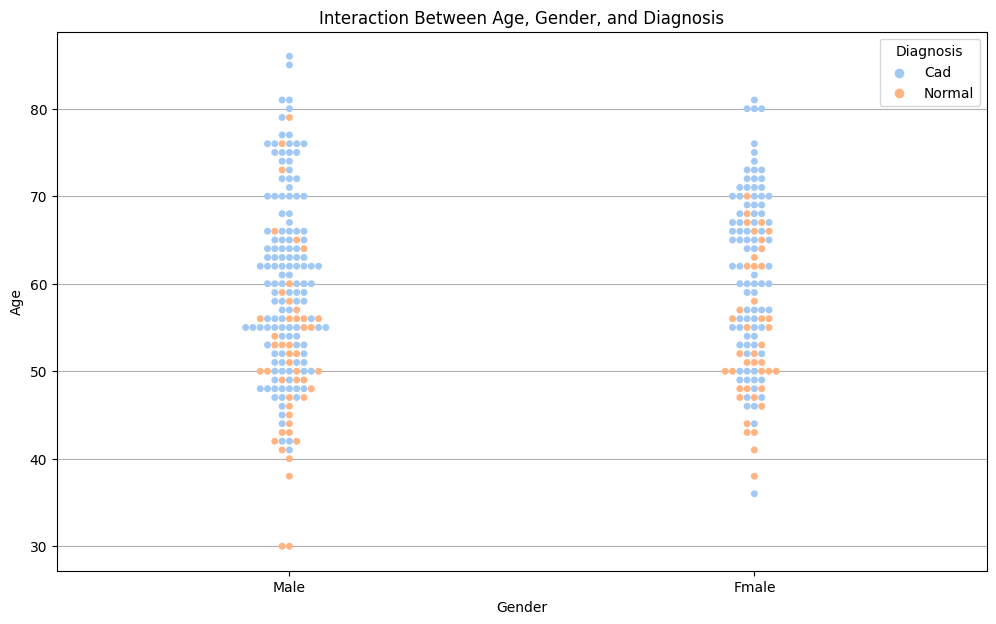

In [15]:
# Plotting swarm plot for interaction between Age, Gender, and Diagnosis
plt.figure(figsize=(12, 7))
sns.swarmplot(x=cad_data["Sex"], y=cad_data["Age"], hue=cad_data["Cath"], palette="pastel", size=5)
plt.title('Interaction Between Age, Gender, and Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Diagnosis')
plt.grid(axis='y')
plt.show()

**3.3.3 Age + BP vs Diagnosis**

- Regions with tightly packed red contours, especially in the upper age range, indicate areas with a higher density of patients diagnosed with CAD.
- Regions with tightly packed blue contours represent areas with a higher density of patients diagnosed as normal.

This visualization provides insights into the density of data points across different age and blood pressure ranges, based on diagnosis.
There's a wide spread of blood pressure values across different age groups for both diagnoses. Patients diagnosed with CAD are dispersed throughout the age and blood pressure range, with a slight concentration in the older age groups. Patients diagnosed as normal are also dispersed throughout the age and blood pressure range, but they seem to have a slightly lower average blood pressure compared to CAD patients in the same age range. It appears that blood pressure does not have much.

<ipython-input-16-b4e31474fc33>:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-16-b4e31474fc33>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




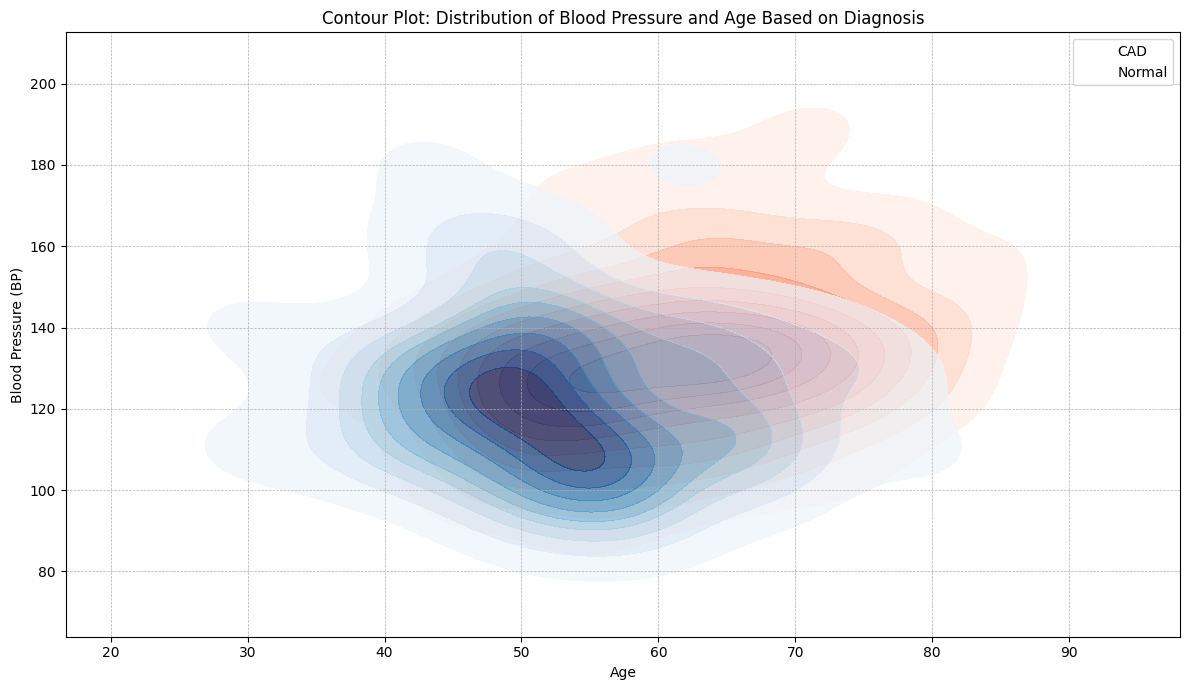

In [16]:

# Filtering data for two different diagnoses
cad_positive = cad_data[cad_data["Cath"] == "Cad"]
cad_negative = cad_data[cad_data["Cath"] == "Normal"]

plt.figure(figsize=(12, 7))

# Plotting for patients diagnosed with CAD
sns.kdeplot(x=cad_positive["Age"], y=cad_positive["BP"], cmap="Reds", shade=True, thresh=0.05, label="CAD", alpha=0.7)

# Plotting for patients diagnosed as normal
sns.kdeplot(x=cad_negative["Age"], y=cad_negative["BP"], cmap="Blues", shade=True, thresh=0.05, label="Normal", alpha=0.7)

plt.title('Contour Plot: Distribution of Blood Pressure and Age Based on Diagnosis')
plt.xlabel('Age')
plt.ylabel('Blood Pressure (BP)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()